In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
from __future__ import print_function, absolute_import, division

In [19]:
import numpy as np
from GomokuBoard import GomokuBoard
from GomokuTools import GomokuTools as gt
from NH9x9 import NH9x9
from NewHeuristics import NewHeuristics

In [20]:
A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U = \
    1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
BLACK=0
WHITE=1
EDGES=2

## Single line scores

```Heuristics``` pre-computes all counts and scores a initialization time 

In [21]:
h = NewHeuristics(kappa=3.0)

Displaying the relevance count, which is a function of the number of offensive stones, their density, and open-ended-ness. Also displaying the score which adds some more fine-grained heuristic relevance aspects.

In [22]:
gt.line_for_xo('...xxo..')

[24, 4]

In [23]:
h.line_score_for(24,4)

3.5

In [24]:
h.lookup_line_score(24,4)

3.5

In [25]:
h.lookup_total_scores(np.array([[[4, 5, 0, 0],[4, 7.5, 0, 0]]]))

array([[6.9, 8. ]])

In [26]:
for i in [
    '...ox...',
    '...x..xo',
    '.....x..',
    '...x.xo.',
    '...x..x.',
    '...xxo..',
    'xx......',
    '...x.x..',
    '..oxx.x.',
    '...xx...',
    '.xx.....',
    '.....xxx',
    '...xxxo.',
    '...xx.x.',
    '...xxx..',
    '.oxxxx..',
    '..xxxx..']:
    print(i, h.lookup_line_score(*gt.line_for_xo(i)))

...ox... 0.5
...x..xo 1.5
.....x.. 2.0
...x.xo. 2.5
...x..x. 3.0
...xxo.. 3.5
xx...... 3.5
...x.x.. 4.0
..oxx.x. 4.5
...xx... 5.0
.xx..... 5.0
.....xxx 5.5
...xxxo. 5.5
...xx.x. 6.0
...xxx.. 7.0
.oxxxx.. 7.5
..xxxx.. 9.0


## Multi-line (neighbourhood) scores

In [27]:
line_counts=9-(np.sqrt(np.random.randint(0,18**2, [5, 5, 4]))).astype(int)/2

In [28]:
line_counts

array([[[4. , 1. , 2. , 6.5],
        [9. , 1.5, 2. , 2. ],
        [1. , 2.5, 3. , 3.5],
        [4.5, 3. , 2.5, 1.5],
        [3.5, 7.5, 3. , 2. ]],

       [[4.5, 2. , 4. , 6. ],
        [3. , 5. , 4. , 1. ],
        [6. , 1.5, 6. , 3.5],
        [2. , 0.5, 2. , 7. ],
        [4.5, 0.5, 3. , 1. ]],

       [[3. , 6.5, 3. , 1. ],
        [3. , 2.5, 2. , 1.5],
        [8. , 3.5, 6. , 2.5],
        [4.5, 1.5, 4.5, 0.5],
        [3.5, 2. , 8. , 5.5]],

       [[2.5, 0.5, 6. , 2.5],
        [2. , 1. , 6. , 3.5],
        [3.5, 6. , 6.5, 1.5],
        [3.5, 2.5, 5. , 2. ],
        [2.5, 7. , 1.5, 6.5]],

       [[2.5, 0.5, 2. , 0.5],
        [2. , 1. , 3.5, 2.5],
        [2.5, 0.5, 0.5, 1.5],
        [4.5, 1. , 6.5, 2. ],
        [6. , 4.5, 3. , 7.5]]])

In [29]:
h.lookup_total_scores(line_counts)

array([[7.        , 8.        , 4.11883069, 4.90659947, 8.        ],
       [7.        , 6.9       , 7.        , 7.        , 4.90659947],
       [6.70639473, 3.49318401, 8.        , 7.        , 8.        ],
       [6.14132118, 6.37328545, 7.        , 5.5164795 , 7.        ],
       [2.86939677, 3.88196804, 2.66840165, 7.        , 8.        ]])

---
Some tools for visualization

In [30]:
def nhforxo(e,ne='........', n='........', nw='........'):
    """
    Neighbourhood from xo-strings
    """
    lines = np.array([gt.line_for_xo(xo) for xo in [e,ne,n,nw]])
    lines = np.rollaxis(lines, 1, 0)
    return NH9x9(*lines)

In [31]:
def dsc(h, e,ne='........',n='........', nw='........', kappa=1.2):
    """
    Display the neighbourhood and its score
    """
    counts = [h.lookup_line_score(*gt.line_for_xo(s)) for s in [e,ne,n,nw]]
    print(counts)
    print(h.lookup_total_scores(np.array([[counts]])))
    print(nhforxo(e,ne,n,nw))

---

#### Not strictly dangerous, yet.

In [32]:
dsc(h, '.....xxx')

[5.5, 0.0, 0.0, 0.0]
[[5.5]]
|                 |
|                 |
|                 |
|                 |
|        *   x x x|
|                 |
|                 |
|                 |
|                 |


In [33]:
dsc(h, '.....xxx', '....xx..')

[5.5, 5.0, 0.0, 0.0]
[[6.9]]
|                 |
|                 |
|            x    |
|          x      |
|        *   x x x|
|                 |
|                 |
|                 |
|                 |


In [34]:
dsc(h, '...xx..o', '...x.xo.')

[5.0, 2.5, 0.0, 0.0]
[[5.20020956]]
|                 |
|              o  |
|            x    |
|                 |
|      x * x     o|
|      x          |
|                 |
|                 |
|                 |


In [35]:
dsc(h, '...xxxo.','..x.....')

[5.5, 2.0, 0.0, 0.0]
[[5.5867779]]
|                 |
|                 |
|                 |
|                 |
|      x * x x o  |
|                 |
|    x            |
|                 |
|                 |


### Soft attack

In [36]:
dsc(h, '...x.x.o', '...xx...')

[4.0, 5.0, 0.0, 0.0]
[[6.9]]
|                 |
|                 |
|                 |
|          x      |
|      x *   x   o|
|      x          |
|                 |
|                 |
|                 |


In [37]:
dsc(h, '...xx..o', '...xx...')

[5.0, 5.0, 0.0, 0.0]
[[6.9]]
|                 |
|                 |
|                 |
|          x      |
|      x * x     o|
|      x          |
|                 |
|                 |
|                 |


#### Hard attack

In [38]:
dsc(h, '...xxxo.','.xx.....')

[5.5, 5.0, 0.0, 0.0]
[[6.9]]
|                 |
|                 |
|                 |
|                 |
|      x * x x o  |
|                 |
|    x            |
|  x              |
|                 |


#### Fatal

In [39]:
dsc(h, '...xxx.o')

[7.0, 0.0, 0.0, 0.0]
[[7.]]
|                 |
|                 |
|                 |
|                 |
|      x * x x   o|
|                 |
|                 |
|                 |
|                 |


#### Dead

In [40]:
dsc(h, '...xxxxo')

[7.5, 0.0, 0.0, 0.0]
[[8.]]
|                 |
|                 |
|                 |
|                 |
|      x * x x x o|
|                 |
|                 |
|                 |
|                 |


---
## Scoring the entire board

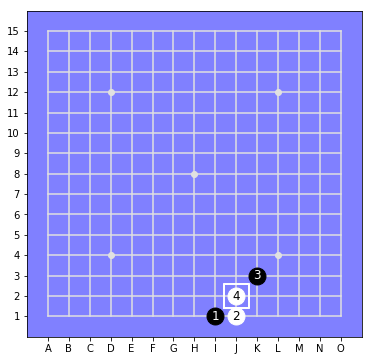

In [41]:
board=GomokuBoard(NewHeuristics(kappa=3.0))
board.set(I,1).set(J,1).set(K,3).set(J,2).display()

We'll be looking at the neighbourhood of position (J,3).

In [42]:
board.getnh(J,3)

|                 |
|                 |
|                 |
|                 |
|        * x      |
|        o        |
|        o        |
|  +     +     +  |
|                 |

In [43]:
board.lines[0][12][9], board.lines[1][12][9], board.lines[2][12][9]

(array([8, 0, 0, 0]), array([ 0,  0, 48,  0]), array([ 0, 64, 64, 64]))

#### Black's perspective

Calculating indices for the count/score lookup

In [44]:
b_indices = 256*board.lines[BLACK]+(board.lines[WHITE] | board.lines[EDGES])

In [45]:
b_indices.shape

(15, 15, 4)

Noticed? This is lookup by array: super-efficient!

In [46]:
b_scores = h.line_scores[b_indices]
b_counts = h.line_scores[b_indices]

In [47]:
b_counts.shape

(15, 15, 4)

In [48]:
# This is position (J,3): a single black stone on the eastern line
b_counts[12][9]

array([2., 0., 0., 0.])

#### White's perspective

In [49]:
w_indices = 256*board.lines[1]+(board.lines[0] | board.lines[2])

In [50]:
w_scores = h.line_scores[w_indices]
w_counts = h.line_scores[w_indices]

In [51]:
# This is position (J,3) - two stones facing north with one open end
w_counts[12][9]

array([0. , 0. , 3.5, 0. ])

In [52]:
# compare: two stones, one open end
h.lookup_line_score(*gt.line_for_xo('.oxx....'))

3.5

# Let's play

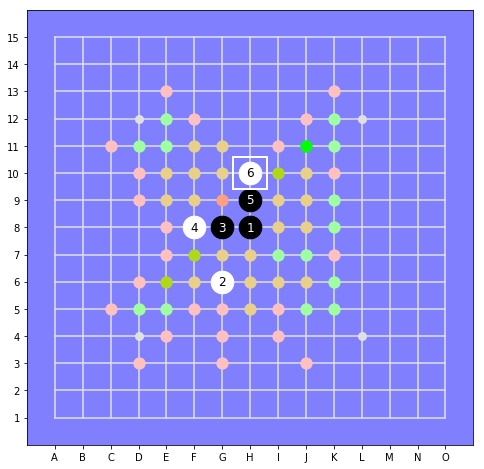

In [54]:
board = GomokuBoard(h, N=15, disp_width=8)
board.set(H,8).set('G',6).set(G,8).set(F,8).set(H,9).set(H,10)
board.display('current');

In [136]:
def position(board, index, viewpoint):
    x,y,vv = pos_and_scores(board, index, viewpoint)
    return "(%s, %s): %1.2f" % (chr(x+64),y,vv)    

In [137]:
def pos_and_scores(board, index, viewpoint):
        mpos = np.divmod(index, 15)
        bpos = gt.m2b(mpos, 15)
        return (bpos[0], bpos[1], 
            board.scores[viewpoint][mpos[0]][mpos[1]])

In [143]:
print(position(board, 126, 0))
pos_and_scores(board, 126, 0)

(G, 7): 5.59


(7, 7, 5.586777904672785)

#### best offensive/defensive

Black to move
Best offensive: (G, 7): 5.59
Best defensive: (K, 10): 5.00
Best mixed:   (K, 8): 7.66


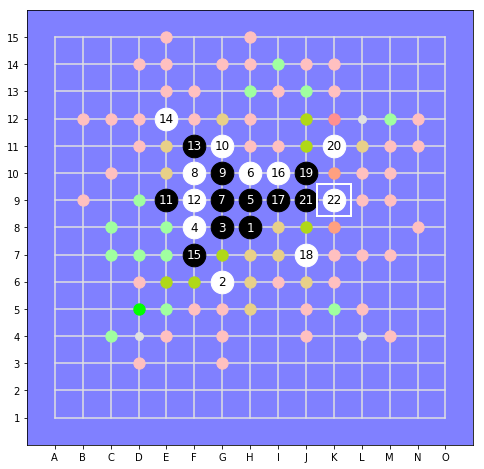

In [226]:
viewpoint = board.current_color
o, d  = np.argmax(board.scores[1-viewpoint]), np.argmax(board.scores[viewpoint]) 
sum_scores = board.scores[viewpoint] + board.scores[1-viewpoint]
s = np.argmax(sum_scores)
#print(b,w,s)
print(("Black" if viewpoint==1 else "White") + " to move")

xo, yo, vo = pos_and_scores(board, o, 1-viewpoint)
xd, yd, vd = pos_and_scores(board, d, viewpoint)

if vo > 7.0:
    print("Immediate win at position (%s, %s)" % (chr(xo+64), yo))
elif vd > 7.0:
    if sorted(board.scores[viewpoint].reshape(15*15))[-2] > 7.0:
        print("Two or more immediate threats. Giving up.")
    print("Defending immediate threat at (%s, %s)" % (chr(xd+64), yd))
elif vo == 7.0:
    print("Win-in-2 at position (%s, %s)" % (chr(xo+64), yo))
elif vd == 7.0:
    print("Defending Win-in-2 at (%s, %s)" % (chr(xd+64), yd))

elif vo == 6.9:
    print("Soft-win-in-2 at position (%s, %s)" % (chr(xo+64), yo))
elif vd == 6.9:
    print("Defending Soft-win-in-2 at (%s, %s)" % (chr(xd+64), yd))
else:    
    print("Best offensive: " + position(board, o, 1-viewpoint))
    print("Best defensive: " + position(board, d, viewpoint))
    mpos = np.divmod(s, 15)
    x,y = gt.m2b(mpos, 15)
    sv = sum_scores[mpos[0]][mpos[1]]
    print("Best mixed:   " + "(%s, %s): %1.2f" % (chr(x+64),y,sv))

board.display('current')

### A non-deterministic policy for non-critical situations

#### Sort all scores with their indices

In [251]:
from operator import itemgetter

w_o, w_d = 0.5, 0.5 # relative weights
oscores = board.scores[1-viewpoint]
dscores = board.scores[viewpoint]
sscores = w_o * oscores + w_d * dscores
top10_o = sorted(list(np.ndenumerate(oscores)), key=itemgetter(1))[-10:]
top10_d = sorted(list(np.ndenumerate(dscores)), key=itemgetter(1))[-10:]
top10_s = sorted(list(np.ndenumerate(sscores)), key=itemgetter(1))[-10:]
top10_o

[((7, 8), 3.7053975277103093),
 ((8, 7), 3.7053975277103093),
 ((8, 8), 3.7053975277103093),
 ((7, 9), 4.409723674632056),
 ((3, 9), 4.999999999999999),
 ((4, 9), 4.999999999999999),
 ((10, 3), 5.499999999999999),
 ((9, 5), 5.50137706565594),
 ((8, 6), 5.586777904672785),
 ((9, 4), 5.586777904672785)]

#### Extract the values 

In [252]:
values = [v for _,v in top10_s]
positions = [p for p,_ in top10_s]
values

[3.112619813750028,
 3.112619813750028,
 3.210043276963292,
 3.2591472429689152,
 3.505181439647264,
 3.505181439647264,
 3.75068853282797,
 3.7933889523363926,
 3.798570391983657,
 3.831782853245266]

#### Softmax: Higher scores get more likely selected

In [253]:
scoreMatExp = np.exp(np.asarray(values))
probs = scoreMatExp / scoreMatExp.sum(0)
probs

array([0.06610144, 0.06610144, 0.07286541, 0.07653269, 0.09788097,
       0.09788097, 0.12511825, 0.13057656, 0.13125489, 0.13568738])

#### Draw by arbitrarily choosing from appropriately-sized buckets

In [368]:
boundaries = [0]+list(np.cumsum(probs))
boundaries

[0,
 0.06610144125629994,
 0.13220288251259987,
 0.20506829055975104,
 0.28160098134040157,
 0.37948195408868773,
 0.4773629268369739,
 0.6024811743035303,
 0.7330577301222763,
 0.8643126163307204,
 0.9999999999999999]

In [369]:
choices = list(zip(boundaries[:-1], positions))
choices

[(0, (8, 7)),
 (0.06610144125629994, (8, 8)),
 (0.13220288251259987, (7, 9)),
 (0.20506829055975104, (4, 9)),
 (0.28160098134040157, (3, 9)),
 (0.37948195408868773, (5, 10)),
 (0.4773629268369739, (9, 5)),
 (0.6024811743035303, (9, 4)),
 (0.7330577301222763, (8, 6)),
 (0.8643126163307204, (7, 10))]

In [261]:
r = np.random.uniform(0,1)
for i in choices[::-1]:
    if r > i[0]:
        print(i[1])
        break

(9, 5)


### Wrap it up in a policy class

In [605]:
class Move:
    def __init__(self, x, y, comment, status):
        self.status=0 # 0: ongoing, -1: giving up, 1: declaring victory
        self.x = x
        self.y = y
        self.comment = comment
        
    def __repr__(self):
        return self.comment+ ("" if self.status != 0 
                              else ": (%s, %s)" % (chr(self.x+64), self.y))

In [606]:
class HeuristicGomokuPolicy:
    def __init__(self, board, style, strictness=0.0):
        self.strictness = strictness
        self.board = board
        self.style = style # 0=aggressive, 1=defensive, 2=mixed
    
    def pos_and_scores(self, index, viewpoint):
        "index: the index of the scored position in a flattened array"
        mpos = np.divmod(index, 15)
        bpos = gt.m2b(mpos, 15)
        return (bpos[0], bpos[1], 
            self.board.scores[viewpoint][mpos[0]][mpos[1]])
    
    def most_critical_pos(self):
        "If this function returns not None, take the move or die."
    
        viewpoint = self.board.current_color
        o = np.argmax(self.board.scores[1-viewpoint])
        d = np.argmax(self.board.scores[viewpoint]) 
        xo, yo, vo = self.pos_and_scores(o, 1-self.board.current_color)
        xd, yd, vd = self.pos_and_scores(d, self.board.current_color)
        #print(xo, yo, vo)
        #print(xd, yd, vd)
        if vo > 7.0:
            return Move(xo, yo, "Immediate win", 1)
        elif vd > 7.0:
            if sorted(self.board.scores[viewpoint].reshape(15*15))[-2] > 7.0:
                return Move(0,0,"Two or more immediate threats. Giving up.", -1)
            return Move (xd, yd, "Defending immediate threat", 0)
        elif vo == 7.0:
            return Move(xo, yo, "Win-in-2", 1)
        elif vd == 7.0:
            return Move(xd, yd, "Defending Win-in-2", 0)

        elif vo == 6.9:
            return Move(xo, yo, "Soft-win-in-2", 0)
        elif vd == 6.9:
            return Move(xd, yd, "Defending Soft-win-in-2", 0)
        else:
            return None
        
        
    def suggest(self):
        critical = self.most_critical_pos()
        if critical is not None:
            return critical
        else:
            suggestions = self.suggest_from_top10()
            r_c = suggestions[self.style]
            x, y = gt.m2b(r_c, board.N)
            return Move(x, y, "Style: %s" % self.style, 0)

        
    def suggest_from_top10(self):
        from operator import itemgetter

        viewpoint = self.board.current_color
        w_o, w_d = 0.5, 0.5 # relative weights
        oscores = self.board.scores[1-viewpoint] # offensive scores
        dscores = self.board.scores[viewpoint] # defensive scores
        sscores = w_o * oscores + w_d * dscores # weighted sum of both scores

        top10s = [sorted(list(np.ndenumerate(score)), key=itemgetter(1))[-10:] 
                  for score in [oscores, dscores, sscores]]

        suggestions=[]
        for top10 in top10s:
            values = [v for _,v in top10]
            positions = [p for p,_ in top10]

            probs = np.exp(np.asarray(values))
            probs = probs / scoreMatExp.sum(0)

            multiplier = (np.arange(10)+1)*self.strictness+1
            probs*=multiplier
            
            boundaries = [0]+list(np.cumsum(probs))
            choices = list(zip(boundaries[:-1], positions))
            suggestions.append(self.draw(choices))

        return suggestions

    
    def draw(self, choices):
        r = np.random.uniform(0,1)
        for i in choices[::-1]:
            if r > i[0]:
                return i[1]


In [649]:
p = HeuristicGomokuPolicy(board, 0, strictness=1.0)

In [650]:
p.pos_and_scores(126, 0)

(7, 7, 0.6299605249474366)

In [651]:
p.most_critical_pos()

In [652]:
p.suggest()

Style: 0: (K, 5)

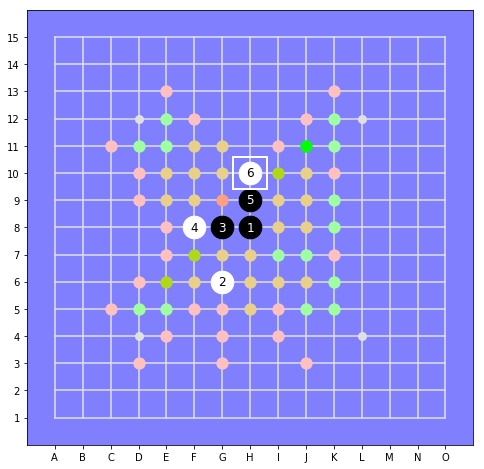

In [717]:
board = GomokuBoard(h, N=15, disp_width=8)
p = HeuristicGomokuPolicy(board, 2)
board.set(H,8).set('G',6).set(G,8).set(F,8).set(H,9).set(H,10)
board.display('current');

Style: 2: (L, 14)


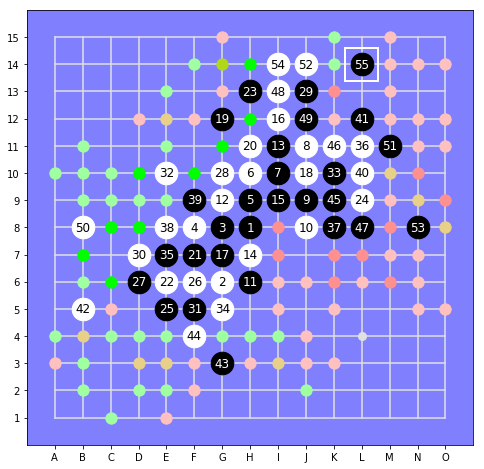

In [766]:
move = p.suggest()
print(move)
if move.status == 0:
    board.set(move.x, move.y)
board.display('current')